In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Analysis of the FT of the pump

### Test : FT of a sine

To test the procedure for the FT and the definition of the proper frequency, we consider a simple sine function

In [3]:
T = 100 # lenght of the time interval
dt = 0.1 # resolution of time sampling
N = int(T/dt) # number of sampled points
print('number of samplings',N)

number of samplings 1000


In [5]:
time = np.linspace(0,T,N)

In [6]:
nu = 0.5

In [7]:
signal = np.sin(2.*np.pi*nu*time)

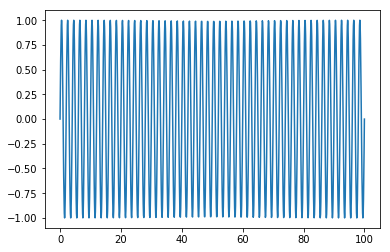

In [8]:
plt.plot(time,signal)

The resolution in frequency space is given by $1/T$ and the frequency variable
ranges from $-N/(2T)$ to $N/(2T)$.

In [9]:
freqs = np.fft.fftfreq(N, d=dt)

In [10]:
print('frequency resolution',freqs[1]-freqs[0])
print('max frequency',freqs.max())
print('min frequency',freqs.min())

frequency resolution 0.01
max frequency 4.99
min frequency -5.0


In [11]:
fourier = np.fft.fft(signal)

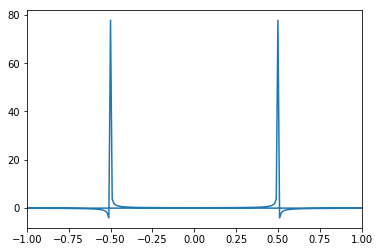

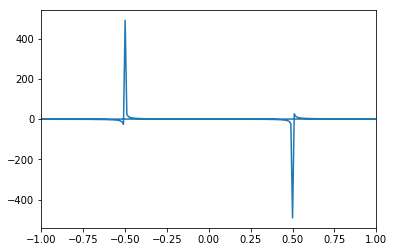

In [13]:
#plt.plot(freq,fourier.real**2+fourier.imag**2)
plt.plot(freqs,fourier.real)
plt.xlim(-1,1)
plt.show()
plt.plot(freqs,fourier.imag)
plt.xlim(-1,1)
plt.show()

We observe that the real part is symmetric in $\nu$ and the imaginary part is antisymmetric,
as expted since the signal is real in time. The peak is at the right frequency

### Test : FT of a Qsin

We perform another analytical test using a Qsin

In [57]:
from mppi import Utilities as U

epump = 1.5 # eV
hplanck = U.Planck_ev_ps*1e3 # Planck constant in ev*fs
nupump = epump/hplanck # in fs^-1

width = 30 # fs
t0 = 3*width

In [58]:
nupump

0.36269838639376023

In [73]:
T = 2000 # lenght of the time interval
dt = 0.01 # resolution of time sampling
N = int(T/dt) # number of sampled points
print('number of samplings',N)

number of samplings 200000


In [74]:
time = np.linspace(0,T,N)

In [75]:
field = np.sin(2.*np.pi*nupump*time)*np.exp(-0.5*((time-t0)/width)**2) 

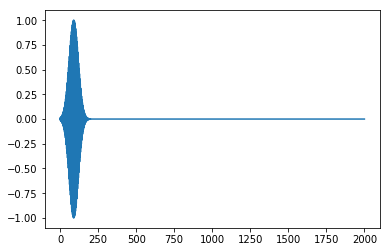

In [76]:
plt.plot(time,field)

In [77]:
freqs = np.fft.fftfreq(N, d=dt)

In [78]:
print('frequency resolution',freqs[1]-freqs[0])
print('max frequency',freqs.max())
print('min frequency',freqs.min())

frequency resolution 0.0005
max frequency 49.9995
min frequency -50.0


In [79]:
fplus = freqs[0:int(N/2)]
fplus

array([0.00000e+00, 5.00000e-04, 1.00000e-03, ..., 4.99985e+01,
       4.99990e+01, 4.99995e+01])

In [80]:
fourier = np.fft.fft(field)
fourierplus = fourier[0:int(N/2)]

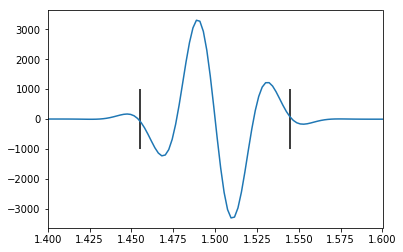

In [82]:
#plt.plot(freq,fourier.real**2+fourier.imag**2)
plt.plot(hplanck*fplus,fourierplus.real)
plt.xlim(epump-0.1,epump+0.1)
spread = 90 # meV
plt.vlines(x=epump-1e-3*spread*0.5,ymin=-1000,ymax=1000)
plt.vlines(x=epump+1.e-3*spread*0.5,ymin=-1000,ymax=1000)
plt.show()